<a href="https://colab.research.google.com/github/mcampos1977/ACCIDENTES-VIALES-R.G-/blob/main/carga_analisis_exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CARGA Y LIMPIEZA DE** **DATOS**

**Conecto el dataset de mi drive en csv**

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Carga de Datos desde csv**

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('/Accidente del 2009 al 2023 -csv- Drive-Municipio de Rio Grande -  - Accidente del 2009 al 2023 - Drive-Municipio de Rio Grande - .csv')

**Visualizar las primeras filas**

In [12]:
display(df.head())


,"Accidentes de tránsito, hechos, víctimas y lesionados y hechos por zona de ocurrencia. Localidad de Río Grande. Años 2009-2023",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Año,Mes,Total,Hechos simples,mortal/Hechos,Mortal/Victimas,Hechos c/lesiones,cant.Lesionados,zona Urbana,Zona Rural,Total Alcohol Positivo
1,2009,NaN,"2,694",2568,5,5,121,163,2622,72,467
2,2009,ene,157,154,0,0,3,3,149,8,25
3,2009,feb,178,176,0,0,2,2,166,12,43
4,2009,mar,267,250,2,2,15,15,259,8,35


**Renombrar columnas**  

In [13]:
new_columns = [
    'Año', 'Mes', 'Total', 'Hechos_simples', 'Mortal_Hechos', 'Mortal_Victimas',
    'Hechos_lesiones', 'Cant_lesionados', 'Zona_urbana', 'Zona_rural', 'Alcohol_positivo'
]
df.columns = new_columns

**Eliminar filas no numericas**

In [14]:
df = df[df['Año'].apply(lambda x: str(x).isdigit())]
df = df.dropna(subset=['Mes', 'Total'])

**columnas a numerico**

In [15]:
cols_to_numeric = ['Total', 'Hechos_simples', 'Mortal_Hechos', 'Mortal_Victimas',
                   'Hechos_lesiones', 'Cant_lesionados', 'Zona_urbana', 'Zona_rural', 'Alcohol_positivo']
for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

**Crear columna "AñoMes" esta columna combina año y mes en un solo valor tipo fecha para nalizar tendencias temporales. Permite graficar y analizar cómo evolucionan los accidentes a lo largo del tiempo de forma continua, no solo por año o mes sueltos.**

In [16]:
df['Año'] = df['Año'].astype(int)
df['Mes'] = df['Mes'].str.lower()
meses = ['ene', 'feb', 'mar', 'abr', 'may', 'jun', 'jul', 'ago', 'sep', 'oct', 'nov', 'dic']
df['Mes_num'] = df['Mes'].apply(lambda x: meses.index(x) + 1 if x in meses else None)
df.dropna(subset=['Mes_num'], inplace=True) # Drop rows where Mes_num is NaN
df['Mes_num'] = df['Mes_num'].astype(int) # Convert Mes_num to integer
df['AñoMes'] = pd.to_datetime(df['Año'].astype(str) + '-' + df['Mes_num'].astype(str) + '-01', format='%Y-%m-%d') # Specify format

**informacion del dataset**

In [17]:
print("\nCantidad de filas y columnas:", df.shape)
print("\nColumnas y tipos de datos:")
print(df.dtypes)


Cantidad de filas y columnas: (177, 13)

Columnas y tipos de datos:
Año                          int64
Mes                         object
Total                      float64
Hechos_simples             float64
Mortal_Hechos              float64
Mortal_Victimas            float64
Hechos_lesiones            float64
Cant_lesionados            float64
Zona_urbana                float64
Zona_rural                 float64
Alcohol_positivo             int64
Mes_num                      int64
AñoMes              datetime64[ns]
dtype: object


**Para una mejor interpretacion renombre las columnas**

In [18]:
new_columns = [
    'Año', 'Mes', 'Total', 'Hechos_simples', 'Mortal_Hechos', 'Mortal_Victimas',
    'Hechos_lesiones', 'Cant_lesionados', 'Zona_urbana', 'Zona_rural', 'Alcohol_positivo', 'Mes_num', 'AñoMes'
]
df.columns = new_columns
print(df.columns)

Index(['Año', 'Mes', 'Total', 'Hechos_simples', 'Mortal_Hechos',
       'Mortal_Victimas', 'Hechos_lesiones', 'Cant_lesionados', 'Zona_urbana',
       'Zona_rural', 'Alcohol_positivo', 'Mes_num', 'AñoMes'],
      dtype='object')


**ELiminar filas no numericas**

In [19]:
for col in df.columns:
    if col not in ['Año', 'Mes']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [20]:
columnas_a_convertir = df.select_dtypes(include=['float', 'int']).columns
df[columnas_a_convertir] = df[columnas_a_convertir].fillna(0).astype(int)
display(df.head())

,Año,Mes,Total,Hechos_simples,Mortal_Hechos,Mortal_Victimas,Hechos_lesiones,Cant_lesionados,Zona_urbana,Zona_rural,Alcohol_positivo,Mes_num,AñoMes
2,2009,ene,157,154,0,0,3,3,149,8,25,1,1230768000000000000
3,2009,feb,178,176,0,0,2,2,166,12,43,2,1233446400000000000
4,2009,mar,267,250,2,2,15,15,259,8,35,3,1235865600000000000
5,2009,abr,217,202,1,1,14,13,209,8,36,4,1238544000000000000
6,2009,may,233,225,0,0,8,10,224,9,43,5,1241136000000000000


**Recetear indices muchas veces los indices quedan desordenados, receteandolos vuelven a ser consecutivos**

In [21]:
df = df.reset_index(drop=True)

# **ANALISIS** **EXPLORATORIO**

***Estadistica Descriptiva ***

In [22]:
print("\nEstadística descriptiva:")
display(df.describe())



Estadística descriptiva:


,Año,Total,Hechos_simples,Mortal_Hechos,Mortal_Victimas,Hechos_lesiones,Cant_lesionados,Zona_urbana,Zona_rural,Alcohol_positivo,Mes_num,AñoMes
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,1.770000e+02
mean,2016.067797,156.881356,135.870056,0.361582,0.435028,18.508475,26.209040,150.598870,4.423729,24.587571,6.531073,1.468261e+18
std,4.333528,115.922400,118.098236,0.660831,1.037651,13.136572,15.617092,117.247275,7.110819,15.930048,3.432862,1.369094e+17
min,2009.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.230768e+18
25%,2012.000000,55.000000,37.000000,0.000000,0.000000,12.000000,16.000000,53.000000,1.000000,14.000000,4.000000,1.351728e+18
50%,2016.000000,115.000000,85.000000,0.000000,0.000000,18.000000,24.000000,111.000000,3.000000,21.000000,7.000000,1.470010e+18
75%,2020.000000,240.000000,225.000000,1.000000,1.000000,25.000000,35.000000,234.000000,5.000000,35.000000,9.000000,1.585699e+18
max,2023.000000,457.000000,445.000000,3.000000,9.000000,145.000000,90.000000,453.000000,55.000000,70.000000,12.000000,1.701389e+18


**Accidentes con alcohol por año**

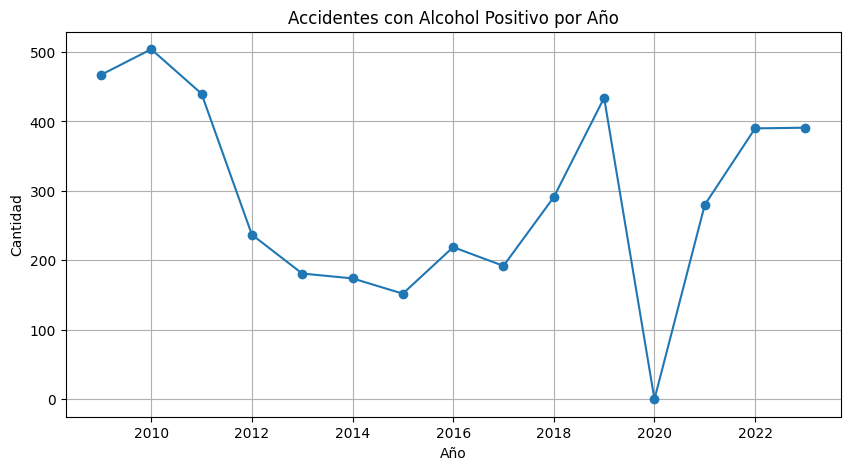

In [23]:
plt.figure(figsize=(10, 5))
df.groupby('Año')['Alcohol_positivo'].sum().plot(marker='o')
plt.title('Accidentes con Alcohol Positivo por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.grid()
plt.show()

**Accidentes con alcohol positivo por mes**

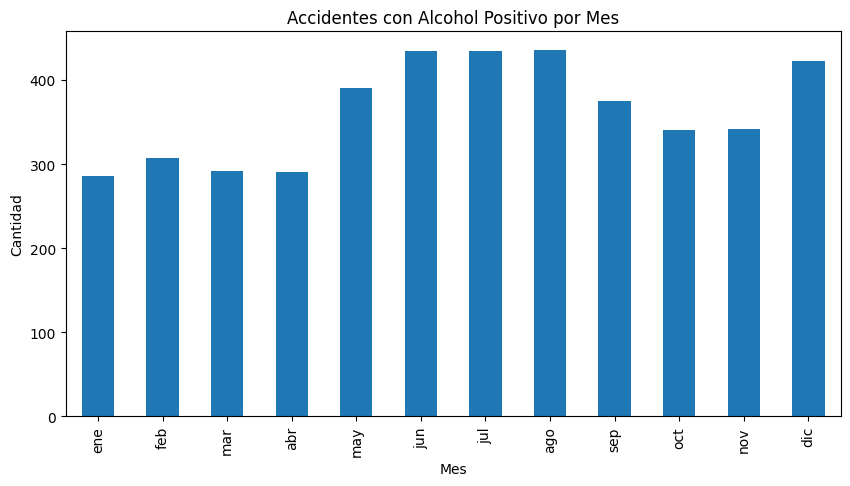

In [24]:
plt.figure(figsize=(10, 5))
df.groupby('Mes')['Alcohol_positivo'].sum().loc[meses].plot(kind='bar')
plt.title('Accidentes con Alcohol Positivo por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.show()

**Accidentes por zona urbana y rural**

<Figure size 1000x500 with 0 Axes>

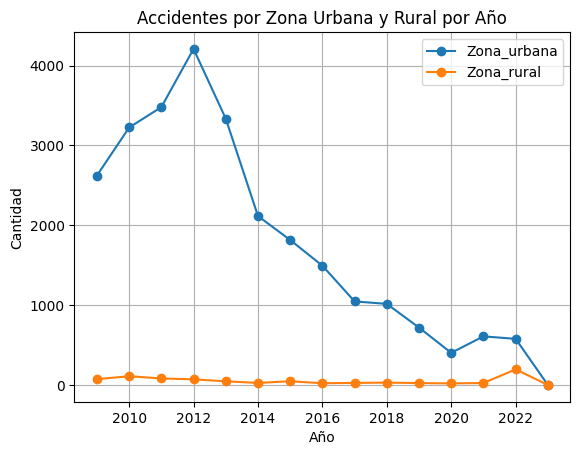

In [25]:
plt.figure(figsize=(10, 5))
df.groupby('Año')[['Zona_urbana', 'Zona_rural']].sum().plot(marker='o')
plt.title('Accidentes por Zona Urbana y Rural por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.grid()
plt.show()

**Correlacion entre variables numericas**

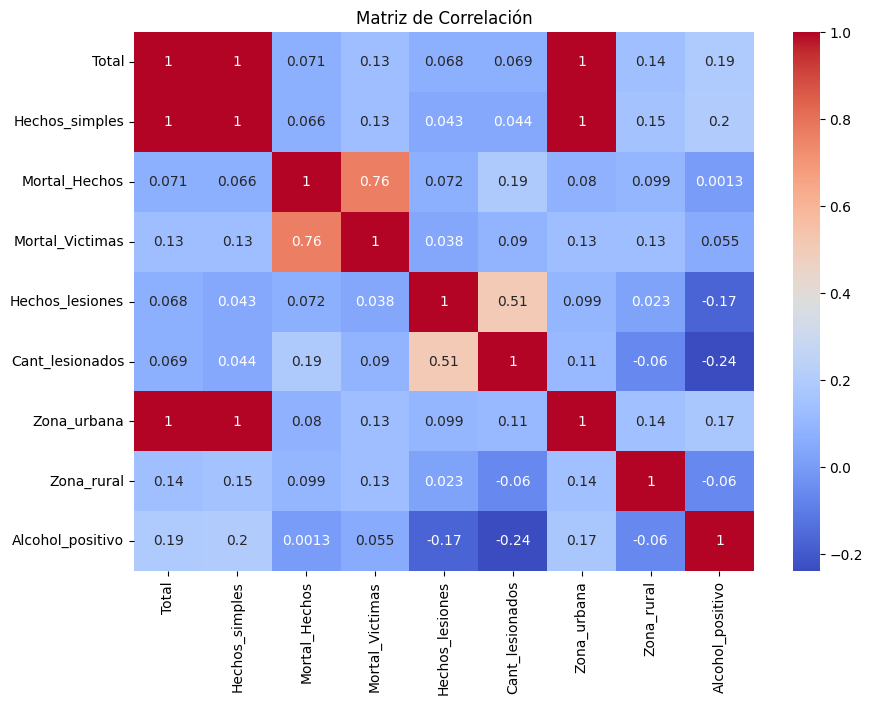

In [26]:
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(df[cols_to_numeric].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()